In [ ]:
import pandas as pd

sentiment = pd.read_csv('/content/fear_greed_index.csv')
traders = pd.read_csv('/content/historical_data.csv')

print(sentiment.head())
print('\n')
print(traders.head())


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:5

In [ ]:
import pandas as pd

sentiment['Date'] = pd.to_datetime(sentiment['date']).dt.date

traders['Date'] = pd.to_datetime(traders['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

merged_df = pd.merge(traders, sentiment[['Date', 'classification']], on='Date', how='inner')

merged_df[['Timestamp IST', 'Closed PnL', 'Size USD', 'Fee', 'classification']].head()


,Timestamp IST,Closed PnL,Size USD,Fee,classification
0,02-12-2024 22:50,0.0,7872.16,0.345404,Extreme Greed
1,02-12-2024 22:50,0.0,127.68,0.005600,Extreme Greed
2,02-12-2024 22:50,0.0,1150.63,0.050431,Extreme Greed
3,02-12-2024 22:50,0.0,1142.04,0.050043,Extreme Greed
4,02-12-2024 22:50,0.0,69.75,0.003055,Extreme Greed


**1.Average Profit/Loss (Closed PnL) by Sentiment**

In [10]:
import os

os.makedirs('/content/outputs', exist_ok=True)


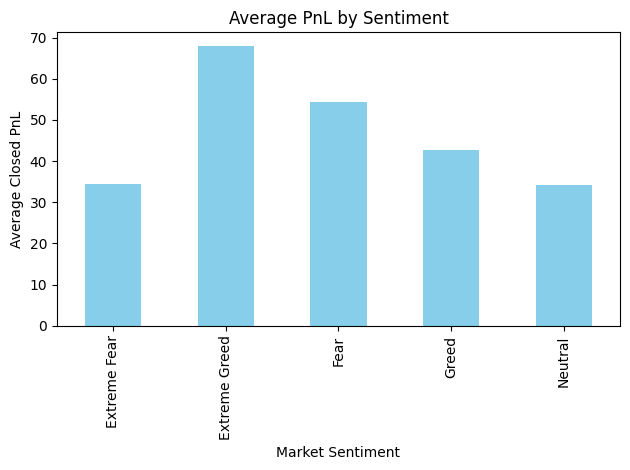

In [11]:
import matplotlib.pyplot as plt

merged_df.groupby('classification')['Closed PnL'].mean().plot(
    kind='bar', color='skyblue', title='Average PnL by Sentiment'
)
plt.ylabel('Average Closed PnL')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.savefig('/content/outputs/avg_pnl_by_sentiment.png')
plt.show()


**2. Total Trade Volume (Size USD) by Sentiment**

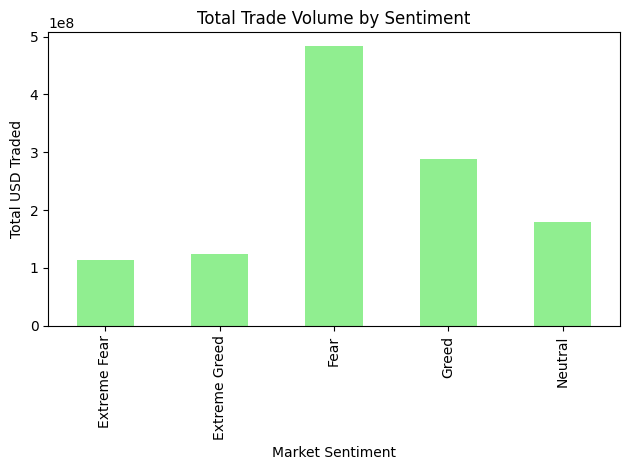

In [12]:
merged_df.groupby('classification')['Size USD'].sum().plot(
    kind='bar', color='lightgreen', title='Total Trade Volume by Sentiment'
)
plt.ylabel('Total USD Traded')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.savefig('outputs/total_volume_by_sentiment.png')
plt.show()


**3. Distribution of Closed PnL per Sentiment (Histogram)**

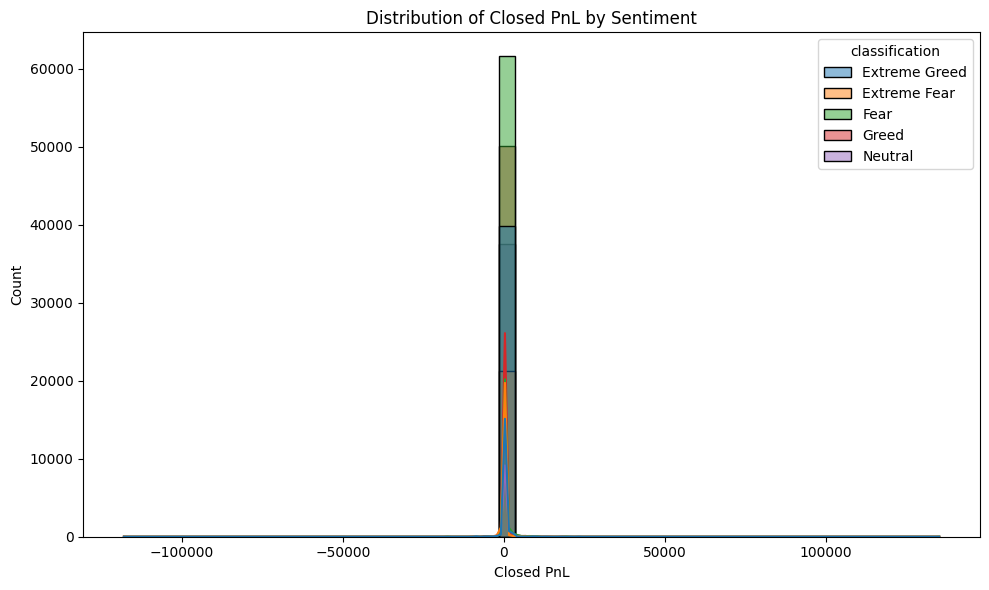

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='Closed PnL', hue='classification', bins=50, kde=True)
plt.title('Distribution of Closed PnL by Sentiment')
plt.tight_layout()
plt.savefig('outputs/pnl_distribution_by_sentiment.png')
plt.show()


**4. Average Transaction Fee by Sentiment**

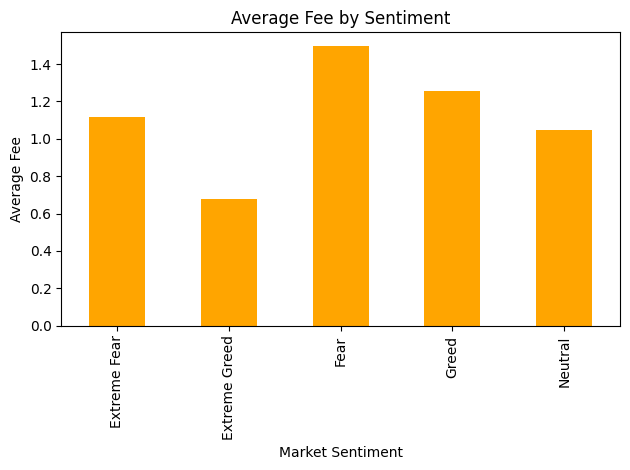

In [14]:
merged_df.groupby('classification')['Fee'].mean().plot(
    kind='bar', color='orange', title='Average Fee by Sentiment'
)
plt.ylabel('Average Fee')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.savefig('outputs/avg_fee_by_sentiment.png')
plt.show()
